In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Polynomial regression

![](image1.PNG)

***

![](image2.png)


***
***


#### Polynomial regression used in cases where the simple and multi linear regression fail.  

Example cases like - When the pandemics or diseases spread.


# why polynomial regression is called linear?

$$ y = b_0 + b_1x_1 + b_2x_1^2 + . . . + b_nx_1^n  $$

When we talk about linear and non-linear we are not actually talking about the x-variables even though the relationship between y and x  is non-linear here, when we talk about class of regression we are talking about  whether they are linear or non-linear i.e, wheter the function can be expressed as linear combination of these coefficeints coz ultimately they are the unknowns so linear or non-linear refers to the coefficients. 



Polynomial ( means having more than one term) regression is

- __linear__ when the highest power of the independent variable is 1 ( an equation of a straight line), y= a+ b x
- __multiple linear__ when it involves more than one independent variable , with power 1., e.g., z= a+ b x + c y
- __nonlinear__ when it involves higher powers of the variable, e.g., y = a+ bx + c$x^2$ , or still higher powers of x

Polynomial regression is a kind of linear regression.

Suppose you fit a model $$ Y = a_0 + a_1x + a_2x^2 + a_kx^k $$

Treat $ x, x^2,. . . .x^k $ as k variables. This is a linear function of $a_0, a_1,  . ., a_k$.

### Reference:

1. [Introduction to Linear Regression and Polynomial Regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)
2. [Polynomial Regression: Adding Non-Linearity To A Linear Model](https://blog.quantinsti.com/polynomial-regression-adding-non-linearity-to-a-linear-model/)

## Going to build regressors which are not linear in nature


We are going to build new regressors that are not linear anymore. So polynomial regression is not a linear regressor. Then we will build a SVR(Supprt vector regressor) which is not a linear regressor either. Then we will build decision tree regressor model and then random forest regression model which are not linear regressors either.


Polynomial regression model that we're about to build right now is not that much advanced compared to simple regression and multiple regression because we will just add a polynomial term in the multiple in our regression equation which you know well. 

But what's coming next with on regression will be based on more complex theory.

### Implementing polynomial regression in Python

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


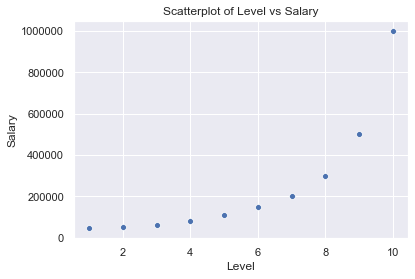

In [3]:
sns.scatterplot(data = dataset, x = 'Level', y = 'Salary');
plt.title('Scatterplot of Level vs Salary');

Observe non-linear relationship between Level and salary however the new employee was saying that his annual salary was `$160k`. Now we need to see whether it was truth or bluff by building a bluff detector using polynomial regression.  

We need to predict salary based on that different levels we have and then predict salary of a Level 6.5.  

We need only 2 columns here the Level and salary column because the column Position is like integer-encoded as Level so will ignore Position column.

In [4]:
dataset.iloc[:,1].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

Observe we get vector here instead of matrix, for matrix use slice of `dataset.iloc[:,1:2].values`.

In [5]:
#  to get matrix of X
X = dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
# to get y as vector
y = dataset.iloc[:,2]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Here the dataset is very small and we will miss out on datapoints of some job levels if we go onto split the data so for this case we will train the entire dataset.

In [7]:
# Splitting the dataset into train and test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

__Is Feature scaling required?__ - No need for feature scaling as polynomial regression consists of adding some polynomial terms into multiple linear regression equation and therefore we will use the same linear regressin library.

In [8]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScalerardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

Will be using both Linear regression and polynomial regression so that we can compare result at the end.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Fitting linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Reference__: [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [11]:
# Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)

poly_reg is a tool/transorm features of X into a new features of matrix called X_poly which will be a new matrix of features containing different powers of x say, $x_1$, $x_1^2$, $x_1^3$, etc as required.

In [12]:
# Creating the X_poly matrix
# will be using fit_transform() here as we will change X
X_poly = poly_reg.fit_transform(X)
X_poly   

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

($x_0$, $x_1$, $x_1^2$)

In [13]:
# Observe X matrix
X  # has only x1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

Now we need to include this fit into multiple linear regression model and to do this we are going to fit a new linear regression object `lin_reg2`. And its purpose is to fit X_poly.

In [14]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualizing the Linear Regression results

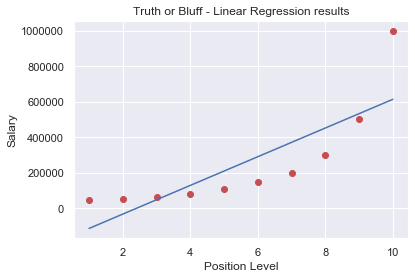

In [16]:
plt.scatter(X, y, color = 'r');
plt.plot(X, lin_reg.predict(X), color = 'b');
plt.title("Truth or Bluff - Linear Regression results");
plt.xlabel('Position Level');
plt.ylabel('Salary');

Visualizing the polynomial regression results

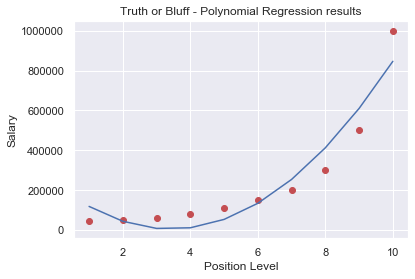

In [19]:
plt.scatter(X, y, color = 'r');
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = 'b');
plt.title("Truth or Bluff - Polynomial Regression results with degree 2");
plt.xlabel('Position Level');
plt.ylabel('Salary');

But this is not correct way its better to use `poly_reg.fit_transform(X)` in place of X_poly (i.e, y) as the function __poly_reg.fit_transform()__ will take any matrix features of X (instead of existing features of X) so in this way our set of codes can be made generic.

#### Now try to fit all the points with degree 3 

In [21]:
# Fitting polynomial regression to the dataset with degree 3
poly_reg3 = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg3.fit_transform(X)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

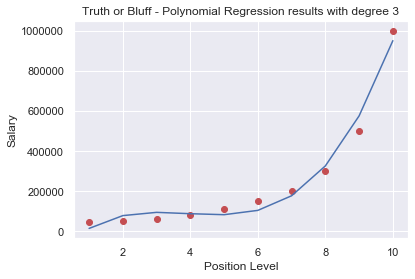

In [23]:
plt.scatter(X, y, color = 'r');
plt.plot(X, lin_reg3.predict(poly_reg3.fit_transform(X)), color = 'b');
plt.title("Truth or Bluff - Polynomial Regression results with degree 3");
plt.xlabel('Position Level');
plt.ylabel('Salary');

So observe the new curve approaches all points more accurately.

#### Now try to fit all the points with degree 4

In [24]:
# Fitting polynomial regression to the dataset with degree 4
poly_reg4 = PolynomialFeatures(degree = 4)
X_poly4 = poly_reg4.fit_transform(X)
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

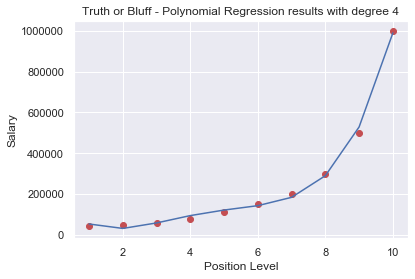

In [25]:
plt.scatter(X, y, color = 'r');
plt.plot(X, lin_reg4.predict(poly_reg4.fit_transform(X)), color = 'b');
plt.title("Truth or Bluff - Polynomial Regression results with degree 4");
plt.xlabel('Position Level');
plt.ylabel('Salary');

So the above prediction is fairly accurate. But we can improve more upon this plot. By improving the resolution or steps taken from 1 to 0.1 

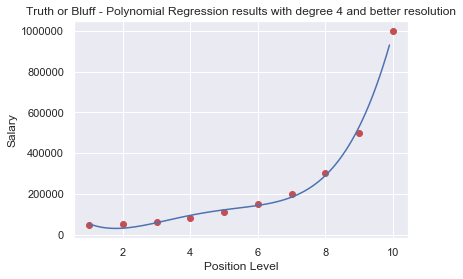

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'r');
plt.plot(X_grid, lin_reg4.predict(poly_reg4.fit_transform(X_grid)), color = 'b');
plt.title("Truth or Bluff - Polynomial Regression results with degree 4 and better resolution");
plt.xlabel('Position Level');
plt.ylabel('Salary');

> To tell whether the employee was bluffing or telling the truth. He said his salary was 160,000 for level 6.5.

Predicting the new result with linear regression

In [30]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Predicting the new result with polynomial regression

In [31]:
lin_reg4.predict(poly_reg4.fit_transform([[6.5]]))

array([158862.45265153])

So the employee was tellin the truth his salary is close to `$160000`.

***

### [How do you know you need a polynomial regression?](https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/)

A cubic has two humps–one facing upward and the other down.  The curve goes down, back up, then back down again (or vice-versa).

There are three main situations that indicate a linear relationship may not be a good model.

1. Most important is the theoretical one.  There are some relationships that a researcher will hypothesize is curvilinear (In geometry, curvilinear coordinates are a coordinate system for Euclidean space in which the coordinate lines may be curved.).  Clearly, if this is the case, include a polynomial term.

2. The second chance is during visual inspection of your variables.  This is one of those reasons for always doing univariate and bivariate inspections of your data before you begin your regression analyses.  (You always do this, right?) A simple scatter plot can reveal a curvilinear relationship.

3. Inspection of residuals.  If you try to fit a linear model to curved data, a scatter plot of residuals (Y axis) on the predictor (X axis) will have patches of many positive residuals in the middle, but patches of negative residuals at either end (or vice versa).  This is a good sign that a linear model is not appropriate, and a polynomial may do better.